In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import math
import os

In [120]:
dir = "./configs"
files = os.listdir(dir)
for file in files:
    os.system(f'./build/main {dir}/{file}')

In [118]:
df = pd.read_csv("datas/data_phi.csv", sep=";")
df

,t,x
0,0.000,0.100000
1,0.001,0.099501
2,0.002,0.098237
3,0.003,0.096910
4,0.004,0.096263
...,...,...
99995,99.995,0.072877
99996,99.996,0.074194
99997,99.997,0.075394
99998,99.998,0.075983


<Axes: xlabel='t', ylabel=' x'>

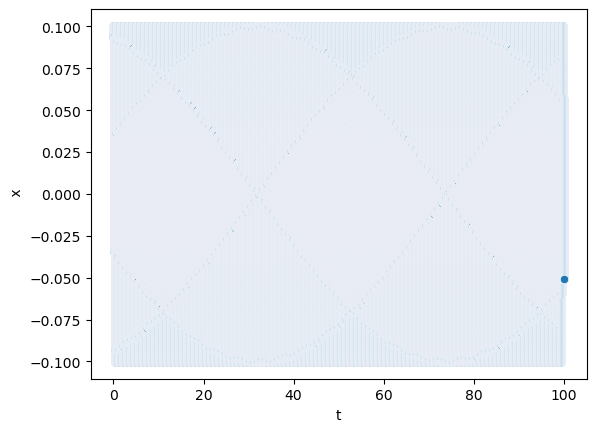

In [112]:
%matplotlib inline
plt.figure()
sns.scatterplot(data=df, x='t', y=' x')

<Axes: xlabel='t', ylabel=' x'>

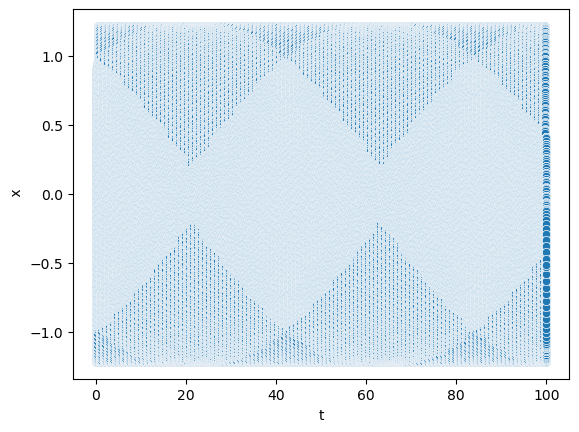

In [113]:
df = pd.read_csv("datas/data_omega.csv", sep=";")
plt.figure()
sns.scatterplot(data=df, x='t', y=' x')

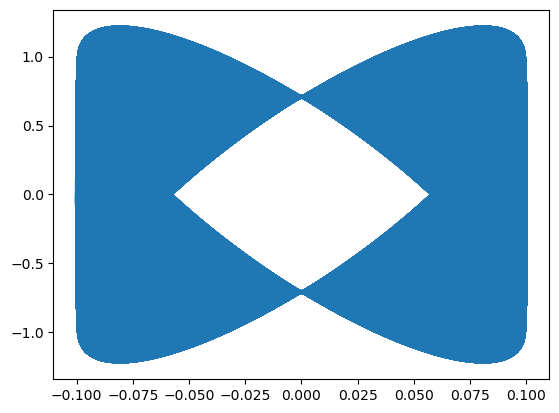

In [114]:
df1 = pd.read_csv("datas/data_phi.csv", sep=";")
df2 = pd.read_csv("datas/data_omega.csv", sep=";")

fig2 = plt.figure()
plt.plot(df1[" x"], df2[" x"], label='parametric curve')
# plt.savefig("./datas/data2.png", bbox_inches='tight')

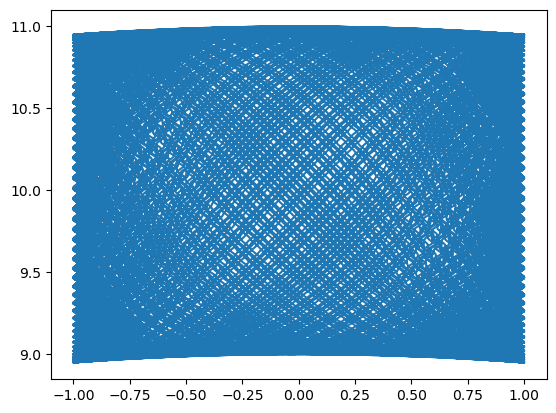

In [115]:
nu = 10
l = 10
a = 1
g = 9.81
m = 234
df1 = pd.read_csv("datas/data_phi.csv", sep=";")
df2 = pd.read_csv("datas/data_omega.csv", sep=";")
x = l*np.sin(df1[" x"])
y = l*np.cos(df1[" x"]) + a*np.cos(nu*df1['t'])
plt.plot(x, y)

/tmp/ipykernel_33055/1517215158.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/home/oleg/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:872: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


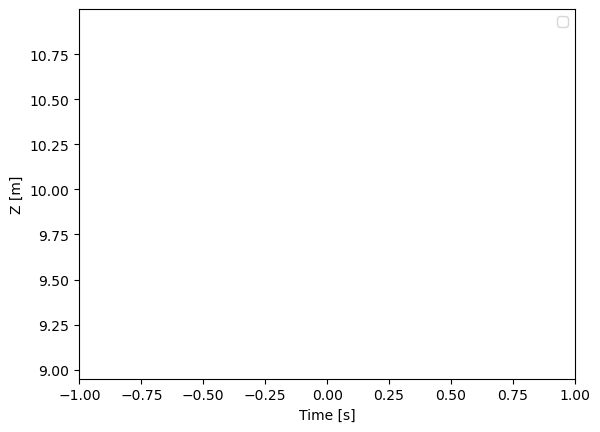

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import math
import os
import matplotlib.animation as animation


N = 10000
h = 0.01*1000
nu = 10
l = 10
a = 1
g = 9.81
m = 234
df1 = pd.read_csv("datas/data_phi.csv", sep=";")
df2 = pd.read_csv("datas/data_omega.csv", sep=";")
X = l*np.sin(df1[" x"])
Y = l*np.cos(df1[" x"]) + a*np.sin(nu*df1['t'])


fig, ax = plt.subplots()



line2 = ax.plot(X[0], Y[0])[0]
ax.set(xlim=[min(X), max(X)], ylim=[min(Y), max(Y)], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = X[:frame]
    y = Y[:frame]
    # update the line plot:
    line2.set_xdata(X[:frame])
    line2.set_ydata(Y[:frame])
    return (line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=N, interval=h)